**Import Dataset**

In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/Sonali210/Twitter_Classification.git

Cloning into 'Twitter_Classification'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [ ]:
ls

sample_data/  Twitter_Classification/


In [ ]:
cd Twitter_Classification/

/content/Twitter_Classification


In [ ]:
ls

Dataset/  README.md  Tweet_emotion.ipynb


In [ ]:
cd Dataset/

/content/Twitter_Classification/Dataset


In [ ]:
ls

README.md  test.csv  training.csv  validation.csv


In [ ]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

In [ ]:
#Print our top 5 rows of train data
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In the above data, "text" is our input tweet and label is emotion

These emotions are labeled as 0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'

In [ ]:
#To read emotions we make a new column(description) defining the label emotion and print head data
labels_description = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_description )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**Exploratory Data Analysis**

In [ ]:
train.describe

<bound method NDFrame.describe of                                                     text  label description
0                                i didnt feel humiliated      0     sadness
1      i can go from feeling so hopeless to so damned...      0     sadness
2       im grabbing a minute to post i feel greedy wrong      3       anger
3      i am ever feeling nostalgic about the fireplac...      2        love
4                                   i am feeling grouchy      3       anger
...                                                  ...    ...         ...
15995  i just had a very brief time in the beanbag an...      0     sadness
15996  i am now turning and i feel pathetic that i am...      0     sadness
15997                     i feel strong and good overall      1         joy
15998  i feel like this was such a rude comment and i...      3       anger
15999  i know a lot but i feel so stupid because i ca...      0     sadness

[16000 rows x 3 columns]>

In [ ]:
#Count of emotions 
train.description.value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

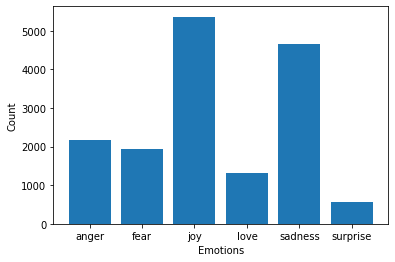

In [ ]:
#Visualise count of emotions
import seaborn as sns
import matplotlib.pyplot as plt
emotion_val=train.groupby('description').count()
plt.bar(emotion_val.index.values, emotion_val['text'])
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

In [ ]:
#Create a column for length of tweets
train['text_length'] = train['text'].astype(str).apply(len) 
#Create a column for count of words in single tweet
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))
train.head()

,text,label,description,text_length,text_word_count
0,i didnt feel humiliated,0,sadness,23,4
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18
4,i am feeling grouchy,3,anger,20,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


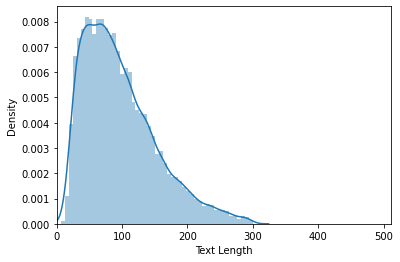

In [ ]:
#Visualise text length graph
sns.distplot(train['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

In [ ]:
#Maximum length of text
train.text_length.max()

300

**Text Preprocessing**

Text preprocessing is a method to clean the text data and make it ready to feed data to the model.

In [ ]:
import unicodedata
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

#Converting unicode to ascii 
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

#Removing stopwords and shortwords
def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

#Combined function that will be called to preprocess our text data
def preprocess_sentence(w):
    #lowercase all the text
    w = unicode_to_ascii(w.lower().strip())
    #Remove puntuations
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    #Calling stopword function
    w=clean_stopwords_shortwords(w)
    w=re.sub(r'@\w+', '',w)
    return w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#While training our model, we only need tweet and label, therefore we drop all other columns
train=train.drop(['description','text_length','text_word_count'],axis=1)
train=train.reset_index(drop=True)
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
#We define a function to call data from train,validation and testing data
def get_tweet(data):
  tweets = data['text']
  labels = data['label']
  return tweets, labels

In [ ]:
#Call train data
tweets, labels = get_tweet(train)

In [ ]:
#Print first row of train data
tweets[0], labels[0]

('i didnt feel humiliated', 0)

**Tokenize**</br>
Tokenization is the process of tokenizing or splitting a string, text into a list of tokens

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
#Print tokens for first tweet data
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

'i didnt feel humiliated'

From above two cells, we conclude that </br> 'i' is tokenised as '2', 'didnt' as '139', 'feel' as '3' and 'humiliated' as '679'.

**Padding and Truncating Sequences** </br>
In order to make all sequences in a batch fit a given standard length, it is necessary to pad or truncate some sequences.

In [ ]:
maxlen = 200

from tensorflow.keras.preprocessing.sequence import pad_sequences
#A function to return padded sentence
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [ ]:
#calling train data for padding
padded_train_seq = get_sequences(tokenizer, tweets)
#print first tweet after padding
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**Creating Model**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen), #Turns positive integers (indexes) into dense vectors of fixed size
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(20, activation='tanh')),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy', #for multiclassification 
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 40)          5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               7440      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 173,606
Trainable params: 173,606
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Calling validation data
val_tweets, val_labels = get_tweet(validation)
#tokenizing tweet text
val_seq = get_sequences(tokenizer, val_tweets)

In [ ]:
#Print validation tweet and label for first row
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
    padded_train_seq, labels,
    validation_data=(val_seq, val_labels),
    epochs=25,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
    ]
)

Epoch 1/25
500/500 [==============================] - 73s 136ms/step - loss: 1.3491 - accuracy: 0.4606 - val_loss: 0.9248 - val_accuracy: 0.6570
Epoch 2/25
500/500 [==============================] - 67s 134ms/step - loss: 0.6715 - accuracy: 0.7331 - val_loss: 0.6287 - val_accuracy: 0.7720
Epoch 3/25
500/500 [==============================] - 66s 133ms/step - loss: 0.4206 - accuracy: 0.8565 - val_loss: 0.5098 - val_accuracy: 0.8340
Epoch 4/25
500/500 [==============================] - 67s 133ms/step - loss: 0.2713 - accuracy: 0.9156 - val_loss: 0.4695 - val_accuracy: 0.8555
Epoch 5/25
500/500 [==============================] - 67s 133ms/step - loss: 0.1961 - accuracy: 0.9402 - val_loss: 0.4245 - val_accuracy: 0.8695
Epoch 6/25
500/500 [==============================] - 66s 133ms/step - loss: 0.1421 - accuracy: 0.9588 - val_loss: 0.4554 - val_accuracy: 0.8795
Epoch 7/25
500/500 [==============================] - 67s 134ms/step - loss: 0.1229 - accuracy: 0.9627 - val_loss: 0.4204 - val_ac

**Evaluating the Model**

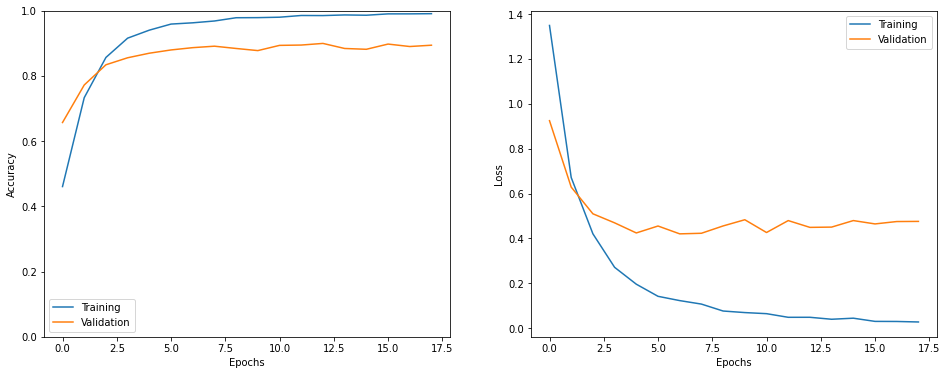

In [ ]:
#Plot graph for loss and accuracy

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)

In [ ]:
score =model.evaluate(test_seq, test_labels)

63/63 [==============================] - 5s 78ms/step - loss: 0.5119 - accuracy: 0.8845


This gives us an accuracy score of 88.4%

In [ ]:
import numpy as np
import random
#calling a random test tweet and its label stored and label predicted
i = random.randint(0, len(test_labels) -1)
print("Tweet: ", test_tweets[i])
print("Emotion: ", test_labels[i])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = np.argmax(p).astype('uint8')

print('Predicted Emotion: ', pred_class)

Tweet:  i ventured into fabrics amp fabrics on a whim yesterday feeling a bit nervous knowing i would be tempted beyond my comfor
Emotion:  4
Predicted Emotion:  4
